# Invesitgation on sleep disorders

This project will use synthesis dataset from kaggle and investigate using traditional machine learning and data visulisation the cause of sleep disorders.


## Importing the data from kaggle

We will import the dataset directly onto our device and print the path of where it is installed.

In [1]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("siamaktahmasbi/insights-into-sleep-patterns-and-daily-habits")

print("Path to dataset files:", path)

You should consider upgrading via the 'c:\users\benda\anaconda3\python.exe -m pip install --upgrade pip' command.


Path to dataset files: C:\Users\benda\.cache\kagglehub\datasets\siamaktahmasbi\insights-into-sleep-patterns-and-daily-habits\versions\1


Then we will visulise the head of the dataset using pandas,

In [2]:
!pip install pandas



You should consider upgrading via the 'c:\users\benda\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import os

df = pd.read_csv(path+"/sleep_health_lifestyle_dataset.csv")

print(df.head())

   Person ID  Gender  Age     Occupation  Sleep Duration (hours)  \
0          1    Male   29   Manual Labor                     7.4   
1          2  Female   43        Retired                     4.2   
2          3    Male   44        Retired                     6.1   
3          4    Male   29  Office Worker                     8.3   
4          5    Male   67        Retired                     9.1   

   Quality of Sleep (scale: 1-10)  Physical Activity Level (minutes/day)  \
0                             7.0                                     41   
1                             4.9                                     41   
2                             6.0                                    107   
3                            10.0                                     20   
4                             9.5                                     19   

   Stress Level (scale: 1-10) BMI Category  \
0                           7        Obese   
1                           5        Obese

We then are going to visualise the different points to see the spread of the values

In [4]:
!pip install matplotlib
%matplotlib inline # keeps it within the notebook

You should consider upgrading via the 'c:\users\benda\anaconda3\python.exe -m pip install --upgrade pip' command.
UsageError: unrecognized arguments: # keeps it within the notebook


In [5]:
from matplotlib import pyplot as plt


Bad key text.latex.preview in file C:\Users\benda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\benda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\benda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

Counter({'Student': 110, 'Office Worker': 99, 'Manual Labor': 96, 'Retired': 95})


Text(0.5, 1.0, 'BMI Category vs Number of people')

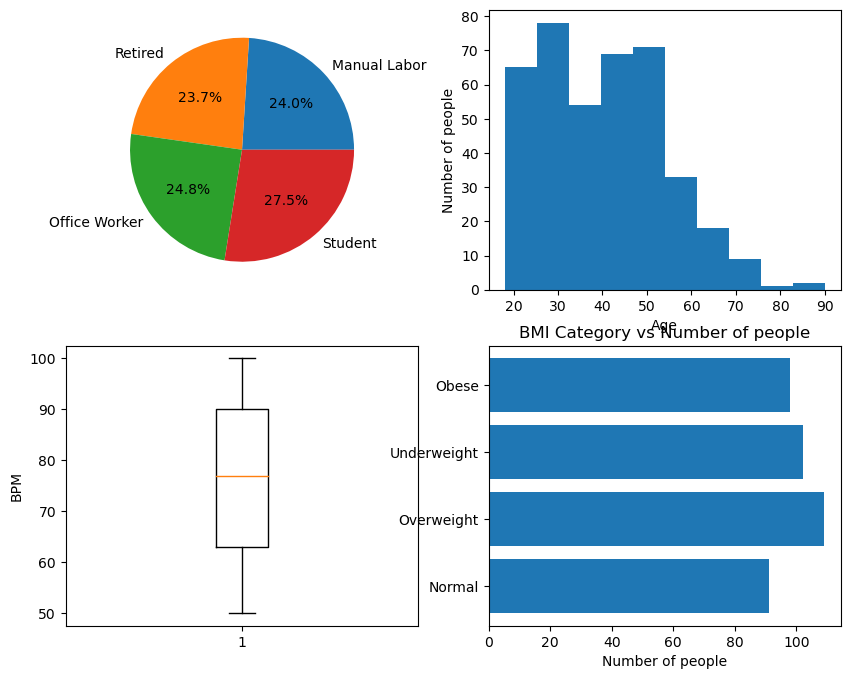

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
import numpy as np

data = Counter(df["Occupation"]) 

y =Counter(data)
print(y)
labels = y.keys()
sizes = y.values()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes[0, 0].pie(sizes, labels=labels,autopct='%1.1f%%')

data = df["Age"]
axes[0,1].hist(data)
axes[0,1].set_xlabel("Age")
axes[0,1].set_ylabel("Number of people")

data = df["Heart Rate (bpm)"]
axes[1,0].boxplot(data)
axes[1,0].set_ylabel("BPM")

data = df["BMI Category"]
y =Counter(data)
y_pos = np.arange(len(y.keys()))
axes[1,1].barh(y_pos, y.values(), align='center')
axes[1,1].set_yticks(y_pos, labels=y.keys())
axes[1,1].invert_yaxis()  # labels read top-to-bottom
axes[1,1].set_xlabel('Number of people')
axes[1,1].set_title('BMI Category vs Number of people')

Now we want to get the distanct value for sleep disoders

In [7]:
a = df['Sleep Disorder'].unique()
print(a)

['None' 'Insomnia' 'Sleep Apnea']


Now we will try to implement classical machine learning to see if classifications can be made.

In [10]:
!pip install scikit-learn
!pip install numpy


You should consider upgrading via the 'c:\users\benda\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\benda\anaconda3\python.exe -m pip install --upgrade pip' command.


In [31]:
import numpy as np
from sklearn.model_selection import train_test_split

We first need to map the text value with numerical value before training a model

In [44]:
mapping_heading = ["Gender","Occupation", "BMI Category", "Blood Pressure (systolic/diastolic)", "Sleep Disorder"]
for heading in mapping_heading:
    mapping = {item:i for i, item in enumerate(df[heading].unique())}
    df[heading] = df[heading].apply(lambda x: mapping[x])

In [45]:
train, test = train_test_split(df, test_size=0.2)

In [46]:
x_train, y_train = train.iloc[:, 1:-1], train.iloc[:,-1]
x_test, y_test = test.iloc[:, 1:-1], test.iloc[:,-1]

In [47]:
x_train

,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps
277,1,18,0,4.2,5.4,39,1,3,65,50,16520
159,1,56,2,11.0,3.8,80,2,1,130,55,17160
106,1,46,1,4.3,6.6,55,8,3,13,64,4217
260,0,18,1,4.8,6.3,33,9,1,65,98,2269
294,1,45,0,9.2,6.0,115,1,1,46,64,10467
...,...,...,...,...,...,...,...,...,...,...,...
340,0,41,2,4.1,6.0,58,1,0,102,58,3717
219,0,47,2,8.5,9.3,84,5,1,171,64,6920
212,0,50,3,10.8,5.8,29,8,2,166,91,14773
13,0,46,2,11.3,7.3,68,8,1,13,74,17020


In [48]:
y_train

277    0
159    1
106    0
260    0
294    0
      ..
340    0
219    0
212    1
13     0
276    0
Name: Sleep Disorder, Length: 320, dtype: int64

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
gnb = GaussianNB()

In [51]:
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [53]:
print("Number of mislabeled points out of a total %d points : %d" % 
      (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 80 points : 20


In [54]:
from sklearn.metrics import f1_score

In [56]:
# Calculate F1 score for each class separately
f1_per_class = f1_score(y_test, y_pred, average=None)

# Calculate micro-average F1 score
f1_micro = f1_score(y_test, y_pred, average='micro')

# Calculate macro-average F1 score
f1_macro = f1_score(y_test, y_pred, average='macro')

# Calculate weighted-average F1 score
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f1_per_class)
print(f1_micro)
print(f1_macro)
print(f1_weighted)

[0.85714286 0.         0.        ]
0.75
0.2857142857142857
0.6428571428571428
